This Project is for practicing, and reference the code in this website：https://reurl.cc/GKMgX3

PassengerId — 乘客編號 

Survived — 是否生還（0=否，1=是；只有訓練集有）

Pclass — 艙等（1, 2, 3）

Name — 姓名

Sex — 性別（male, female）

Age — 年齡

SibSp — 手足及配偶人數


Parch — 父母及子女人數
Ticket — 船票號碼

Fare — 船票價格

Cabin — 艙房號碼

Embarked — 出發港口（C = Cherbourg, Q = Queenstown, S = Southampton）

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [8]:
# Since these features do not play ant significant role in the survival of a person
# drop it first

train_df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)
test_df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)

In [9]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# EDA

In [10]:
# look into training set, how many people survived

train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

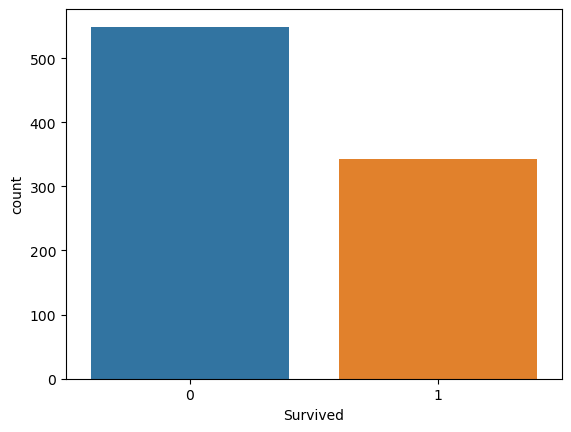

In [11]:
sns.countplot(data=train_df,x='Survived')
plt.show()

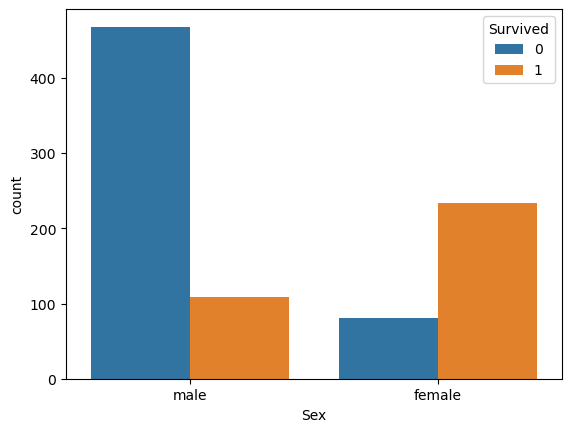

In [12]:
# look into gender, see the men or women died more, obviously men died more
sns.countplot(data=train_df,x='Sex',hue='Survived')
plt.show()

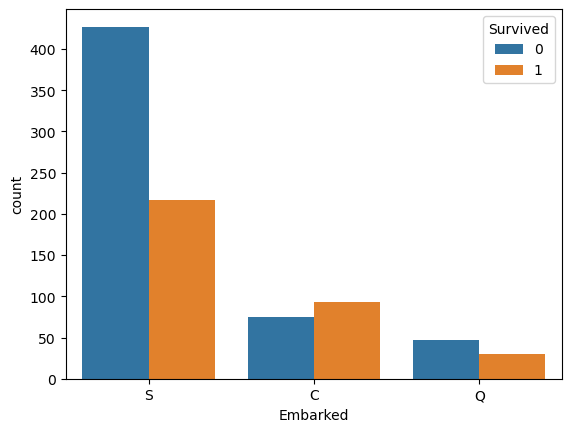

In [13]:
sns.countplot(data=train_df,x='Embarked',hue='Survived')
plt.show()

/Users/eric/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


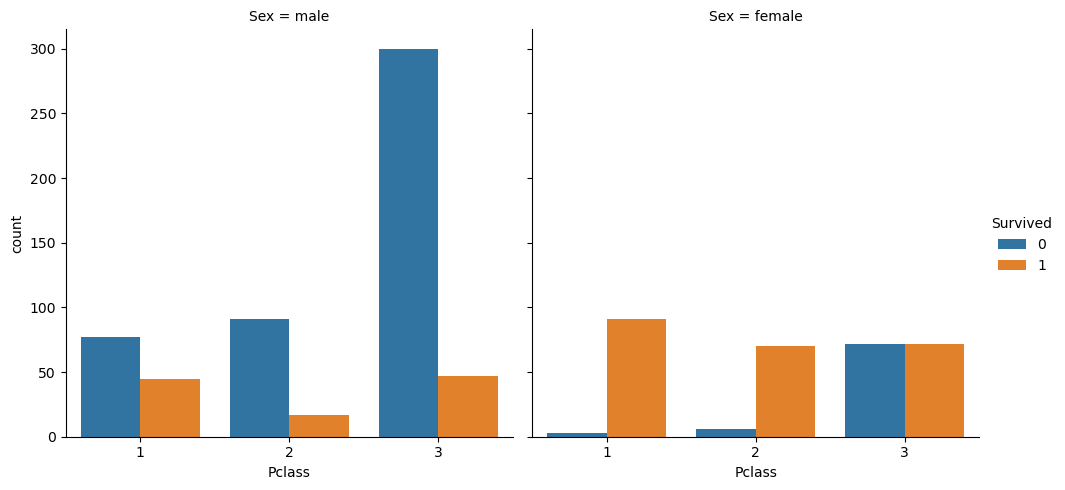

In [14]:
# 艙等越高級 生存率越高
# 當年的鐵達尼號和別的豪華客輪一樣，將救生艇安排在離頭等艙和二等艙最近的位置
# 社會階層的隔離制度和空間構造。當時的美國移民法規定，爲了防止偷渡和傳染病，三等艙乘客要全程與頭等艙和二等艙隔離。
# 因此，三等艙乘客跑到頭等艙，必須要跨越一道道嚴固的柵欄。故頭等艙與二等艙有非常明顯的優勢

sns.catplot(data=train_df,x='Pclass',col='Sex',hue='Survived',kind='count')
plt.show()

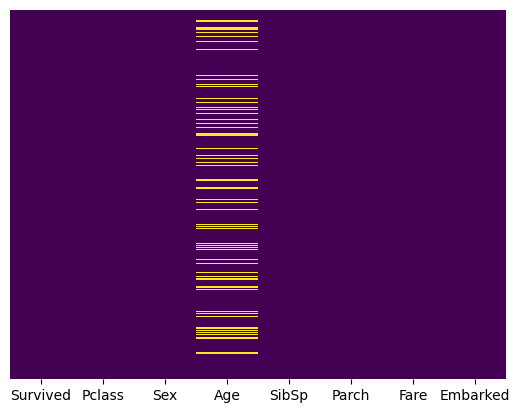

In [15]:
# The column Age has many null values
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

<Axes: >

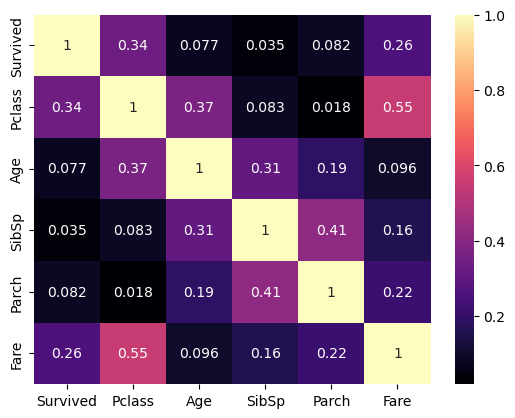

In [16]:
# The more correlation, the color more bright
corr = np.abs(train_df.corr(numeric_only=True))
sns.heatmap(corr,annot=True,cmap='magma')

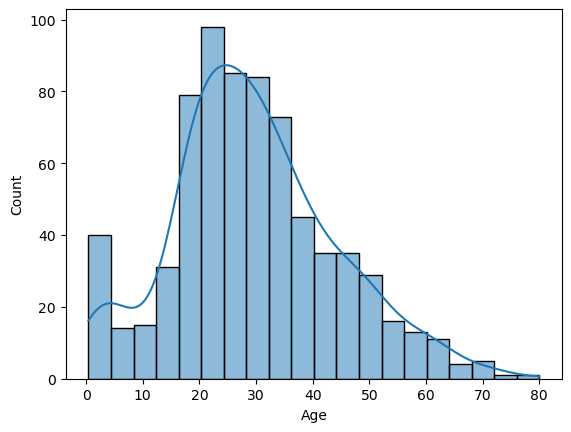

In [17]:
sns.histplot(train_df['Age'].dropna(),kde=True)
plt.show()

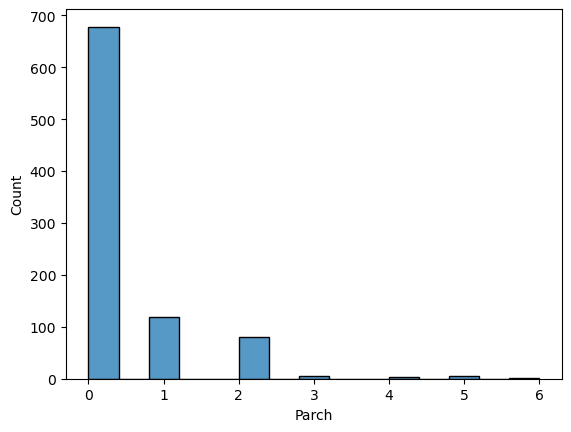

In [18]:
# 父母及子女人數
sns.histplot(train_df['Parch'].dropna(),bins=15)
plt.show()

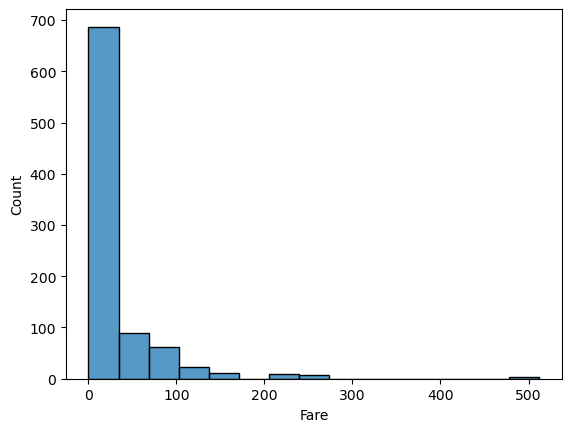

In [19]:
# 船票價格
sns.histplot(train_df['Fare'].dropna(),bins=15)
plt.show()

## Feature Engineering

In [20]:
# replace the Age null values by mean
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
test_df['Age'].fillna(train_df['Age'].mean(),inplace=True)

In [21]:
# There's 15 0's Fare value
train_df[train_df['Fare'] == 0]['Fare'].value_counts()

Fare
0.0    15
Name: count, dtype: int64

In [22]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [23]:
# replace 0's and null values
train_df['Fare'] = train_df['Fare'].replace(0,train_df['Fare'].mean())

# 為了數值的一致性
train_df['Fare'].replace('nan',np.nan,inplace=True)

# fill every nan value to Fare mean value
train_df['Fare'].fillna(train_df['Fare'].mean(),inplace=True)

In [24]:
test_df['Fare'] = test_df['Fare'].replace(0,train_df['Fare'].mean())

test_df['Fare'].replace('nan',np.nan,inplace=True)

test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)

In [25]:
train_df['Embarked'].replace('nan',np.nan,inplace=True)

#[0] 索引選擇第一個元素，即頻率最高的值。
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

test_df['Embarked'].replace('nan',np.nan,inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0],inplace=True)

In [26]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [27]:
# turn into male=0, female=1
train_df['Sex'] = train_df['Sex'].map({'male':0,'female':1})
test_df['Sex'] = test_df['Sex'].map({'male':0,'female':1})

In [28]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,S
1,1,1,1,38.000000,1,0,71.2833,C
2,1,3,1,26.000000,0,0,7.9250,S
3,1,1,1,35.000000,1,0,53.1000,S
4,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,S
887,1,1,1,19.000000,0,0,30.0000,S
888,0,3,1,29.699118,1,2,23.4500,S
889,1,1,0,26.000000,0,0,30.0000,C


In [29]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [30]:
train_df['Embarked'] = train_df['Embarked'].map({'S':0,'C':1,'Q':2})
test_df['Embarked'] = test_df['Embarked'].map({'S':0,'C':1,'Q':2})

In [31]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [32]:
# dealing with skewness, use 'log' to let value close to Normalization
# and reduce the outliers affaction, scaling the data range

train_df['Age'] = np.log(train_df['Age'])
train_df['Fare'] = np.log(train_df['Fare'])

test_df['Age'] = np.log(test_df['Age'])
test_df['Fare'] = np.log(test_df['Fare'])

In [33]:
# spliting into features and targets
X = train_df.drop('Survived',axis=1)
y = train_df['Survived']

In [34]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
xgb = XGBClassifier()
n_estimators = range(6,10)
learning_rate = [0.1,0.2,0.3,0.4]
max_depth = range(5,10)
colsample_bytree = [0.7,0.8,0.9,1]

param_grid = {'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth,
              'colsample_bytree':colsample_bytree}

grid = GridSearchCV(xgb,param_grid,cv=3,n_jobs=1,return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9, 1],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': range(5, 10),
                         'n_estimators': range(6, 10)},
             return_train_score=True)

In [37]:
grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_depth': 5,
 'n_estimators': 7}

In [38]:
# Use gridsearch to find parameters, learning rate =0.2, but I try 0.4, it's better !
xgb = XGBClassifier(n_estimators=9,learning_rate=0.4,max_depth=9,colsample_bytree=0.7)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=9, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [39]:
predictions = xgb.predict(X_test)

cm = confusion_matrix(predictions,y_test)
print(cm)
accuracy_score(predictions,y_test)

[[116  19]
 [ 18  70]]


0.8340807174887892

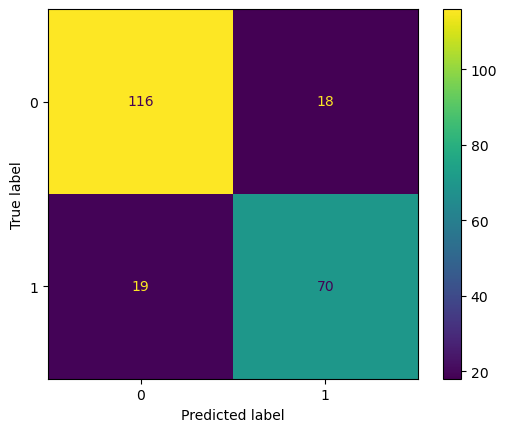

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       135
           1       0.79      0.80      0.79        88

    accuracy                           0.83       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.83      0.83      0.83       223



In [40]:
ConfusionMatrixDisplay.from_estimator(xgb,X_test,y_test)
plt.show()
print(classification_report(predictions,y_test))

In [41]:
grid.best_estimator_.feature_importances_

array([0.14944716, 0.71276194, 0.03126267, 0.04186681, 0.00710817,
       0.03116185, 0.02639141], dtype=float32)

In [42]:
# Clearly, the survival rate is highly correlated with Sex
feats = grid.best_estimator_.feature_importances_
imp_feats = pd.DataFrame(index=X.columns,data=feats,columns=['Importance'])
imp_feats

,Importance
Pclass,0.149447
Sex,0.712762
Age,0.031263
SibSp,0.041867
Parch,0.007108
Fare,0.031162
Embarked,0.026391


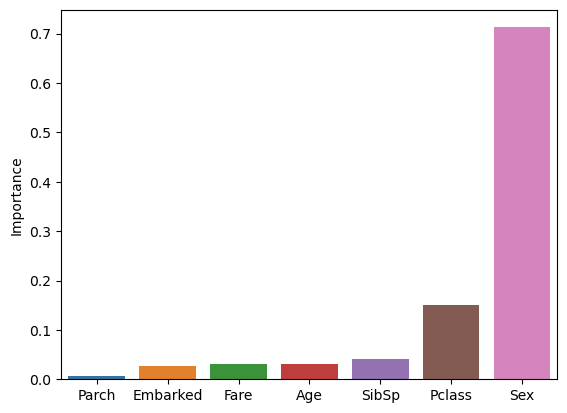

In [43]:
# visualize the Importantce
imp_feats = pd.DataFrame(index=X.columns,data=feats,columns=['Importance']).sort_values('Importance')
sns.barplot(data=imp_feats,x=imp_feats.index,y='Importance')
plt.show()

In [44]:
rfc = RandomForestClassifier()
n_estimators = [100,300,1000]
criterion = ['gini','entropy']
max_depth = range(5,10)
min_samples_split = [10,11,12]

param_grid = {'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth,
              'min_samples_split':min_samples_split}

grid = GridSearchCV(rfc,param_grid,cv=3,n_jobs=-1,return_train_score=True)

grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 10),
                         'min_samples_split': [10, 11, 12],
                         'n_estimators': [100, 300, 1000]},
             return_train_score=True)

In [45]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [47]:
rfc = RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=9,min_samples_split=10,
                            min_samples_leaf=1,bootstrap=True,random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=42)

[[122  28]
 [ 12  61]]


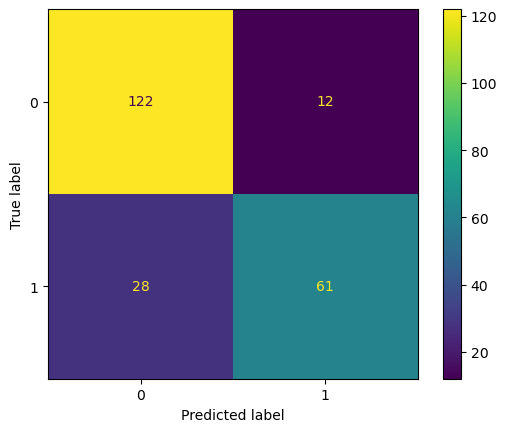

In [48]:
predictions = rfc.predict(X_test)
cm = confusion_matrix(predictions,y_test)
print(cm)
ConfusionMatrixDisplay.from_estimator(rfc,X_test,y_test)
plt.show()

In [49]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       150
           1       0.69      0.84      0.75        73

    accuracy                           0.82       223
   macro avg       0.80      0.82      0.81       223
weighted avg       0.84      0.82      0.82       223



In [50]:
accuracy_score(predictions,y_test)

0.820627802690583